In [20]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('videos-stats.csv')
df

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...,...
1876,1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259.0,416.0,386360.0
1877,1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981.0,72.0,431421.0
1878,1878,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0
1879,1879,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN


In [21]:
# Exploración inicial
print(df.head())
print(df.info())
print(df.describe())


   Unnamed: 0                                              Title     Video ID  \
0           0  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1           1                    The most EXPENSIVE thing I own.  b3x28s61q3c   
2           2                 My New House Gaming Setup is SICK!  4mgePWWCAmA   
3           3  Petrol Vs Liquid Nitrogen | Freezing Experimen...  kXiYSI7H2b0   
4           4                     Best Back to School Tech 2022!  ErMwWXQxHp0   

  Published At Keyword    Likes  Comments      Views  
0   2022-08-23    tech   3407.0     672.0   135612.0  
1   2022-08-24    tech  76779.0    4306.0  1758063.0  
2   2022-08-23    tech  63825.0    3338.0  1564007.0  
3   2022-08-23    tech  71566.0    1426.0   922918.0  
4   2022-08-08    tech  96513.0    5155.0  1855644.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        -------------- 

In [22]:
print(df.dtypes)

Unnamed: 0        int64
Title            object
Video ID         object
Published At     object
Keyword          object
Likes           float64
Comments        float64
Views           float64
dtype: object


In [23]:
# 3. Manejo de valores nulos
df = df.dropna(subset=['Likes', 'Comments'])

In [24]:
# 4. Conversión de tipos de datos
df['Published At'] = pd.to_datetime(df['Published At'])
df['Likes'] = df['Likes'].astype(int)
df['Comments'] = df['Comments'].astype(int)
df['Views'] = df['Views'].astype(int)

C:\Users\PC\AppData\Local\Temp\ipykernel_51112\43512405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Published At'] = pd.to_datetime(df['Published At'])
C:\Users\PC\AppData\Local\Temp\ipykernel_51112\43512405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Likes'] = df['Likes'].astype(int)
C:\Users\PC\AppData\Local\Temp\ipykernel_51112\43512405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [26]:
# 5. Creación del dataframe agrupado
df_grouped = df.groupby('Keyword')[['Likes', 'Comments', 'Views']].agg(['mean', 'sum', 'count'])

In [27]:
# 6. Análisis exploratorio de datos (EDA)
print(df_grouped)

                         Likes                       Comments                 \
                          mean        sum count          mean      sum count   
Keyword                                                                        
animals           7.607758e+05   28909480    38  21871.815789   831129    38   
apple             1.180789e+05    4959314    42   8618.857143   361992    42   
asmr              3.661530e+04    1830765    50   1227.300000    61365    50   
bed               4.736822e+05   20842016    44  15180.954545   667962    44   
biology           6.648379e+04    3124738    47   4292.446809   201745    47   
business          7.198510e+04    3455285    48   1840.395833    88339    48   
chess             3.604238e+04    1693992    47   1472.319149    69199    47   
cnn               8.835740e+03     441787    50   7574.740000   378737    50   
computer science  3.366354e+04    1615850    48   1170.770833    56197    48   
crypto            8.521360e+03     42606

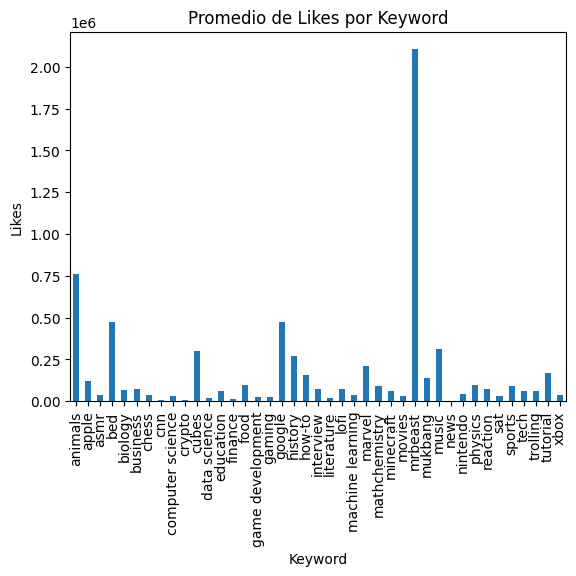

In [28]:
# Gráfico de barras para los KPIs promedio por keyword
df_grouped.loc[:, ('Likes', 'mean')].plot(kind='bar')
plt.title('Promedio de Likes por Keyword')
plt.xlabel('Keyword')
plt.ylabel('Likes')
plt.show()

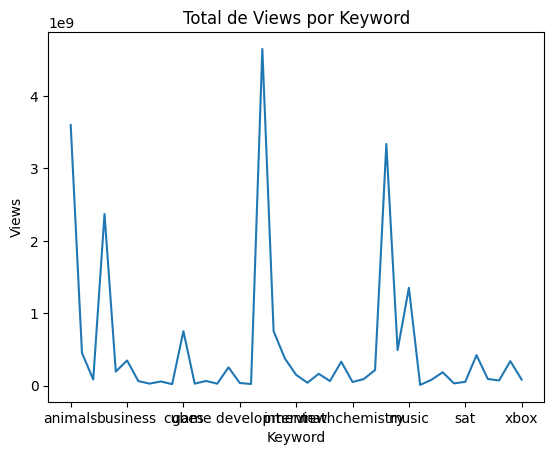

In [29]:
# Gráfico de líneas para los KPIs totales por keyword
df_grouped.loc[:, ('Views', 'sum')].plot(kind='line')
plt.title('Total de Views por Keyword')
plt.xlabel('Keyword')
plt.ylabel('Views')
plt.show()